In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy

In [49]:
STATES = 100
ACTIONS = 20
GAMMA = 0.999
EPSILON = 0.01

In [3]:
rewards = np.random.uniform(size=(STATES, ACTIONS))
p_mat = np.random.uniform(size=(STATES, ACTIONS, STATES))
norms = p_mat.sum(axis=2)
p_mat /= norms[:, :, np.newaxis]

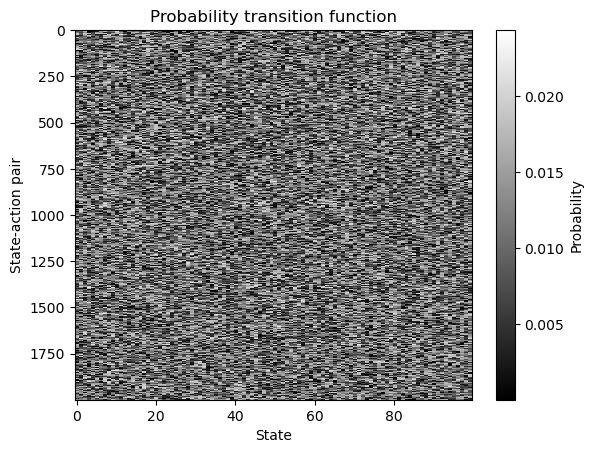

In [8]:
%matplotlib inline

fig, ax = plt.subplots()
plt.title("Probability transition function")
plt.ylabel("State-action pair")
plt.xlabel("State")
heatmap = plt.imshow(np.reshape(p_mat, (STATES*ACTIONS, STATES)), cmap='gray', interpolation='nearest', aspect='auto')
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel("Probability")
plt.show()

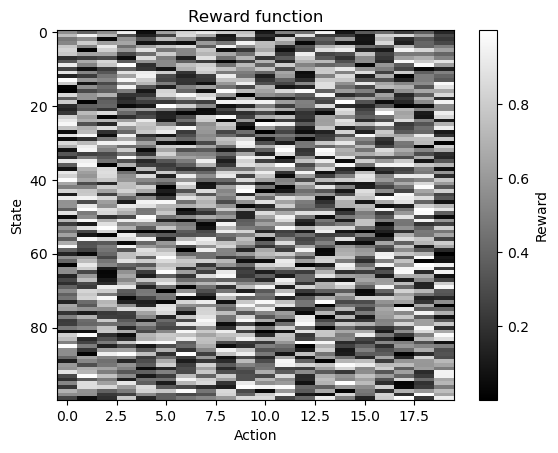

In [9]:
fig, ax = plt.subplots()
plt.title("Reward function")
plt.ylabel("State")
plt.xlabel("Action")
heatmap = plt.imshow(np.reshape(rewards, (STATES, ACTIONS)), cmap='gray', interpolation='nearest', aspect='auto')
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel("Reward")
plt.show()

In [10]:
def bellman_star(V):
    return np.max(rewards + GAMMA*p_mat@V, axis=1)

In [15]:
def bellman(pi, V):
    return rewards[np.arange(STATES), pi] + \
           GAMMA*p_mat[np.arange(STATES), pi]@V

In [11]:
def V_pi(pi): 
    return np.linalg.inv(np.eye(STATES) - GAMMA*p_mat[np.arange(STATES), pi])@rewards[np.arange(STATES), pi]

In [13]:
def greedy(Q):
    return Q.argmax(axis=1)

In [16]:
def Q_pi(V_pi):
    return rewards + GAMMA*p_mat@V_pi

In [53]:
# Find V*
V = np.zeros(STATES)
for i in range(10001):
    V = bellman_star(V)
pi = greedy(Q_pi(V))
V_star = V_pi(pi).mean()
print(f"Mean V*: {V_star}")

Mean V*: 953.3765067878111


In [103]:
# Value iteration
vi_value_hist = []
vi_time_hist = []
vi_iter_hist = []

V = np.zeros(STATES)

t0 = time.time()
i = 0
while np.abs(V.mean() - V_star) > EPSILON:
    i += 1
    V = bellman_star(V)
    
    if i % 500 == 0:
        print(f"iter={i}, mean value={V.mean():.3f}, mean error={V_star - V.mean():.3f}")
    vi_value_hist.append(V_star - V.mean())
    vi_time_hist.append(time.time() - t0)
    vi_iter_hist.append(i+1)

pi = greedy(Q_pi(V))
val = V_pi(pi).mean()
print(f"Final policy: mean value={val:.3f}, mean error={V_star - val:.3f}")

iter=500, mean value=375.269, mean error=578.107
iter=1000, mean value=602.824, mean error=350.552
iter=1500, mean value=740.809, mean error=212.567
iter=2000, mean value=824.480, mean error=128.896
iter=2500, mean value=875.216, mean error=78.160
iter=3000, mean value=905.982, mean error=47.395
iter=3500, mean value=924.637, mean error=28.739
iter=4000, mean value=935.950, mean error=17.427
iter=4500, mean value=942.809, mean error=10.567
iter=5000, mean value=946.969, mean error=6.408
iter=5500, mean value=949.491, mean error=3.886
iter=6000, mean value=951.020, mean error=2.356
iter=6500, mean value=951.948, mean error=1.429
iter=7000, mean value=952.510, mean error=0.866
iter=7500, mean value=952.851, mean error=0.525
iter=8000, mean value=953.058, mean error=0.319
iter=8500, mean value=953.183, mean error=0.193
iter=9000, mean value=953.259, mean error=0.117
iter=9500, mean value=953.305, mean error=0.071
iter=10000, mean value=953.333, mean error=0.043
iter=10500, mean value=953.

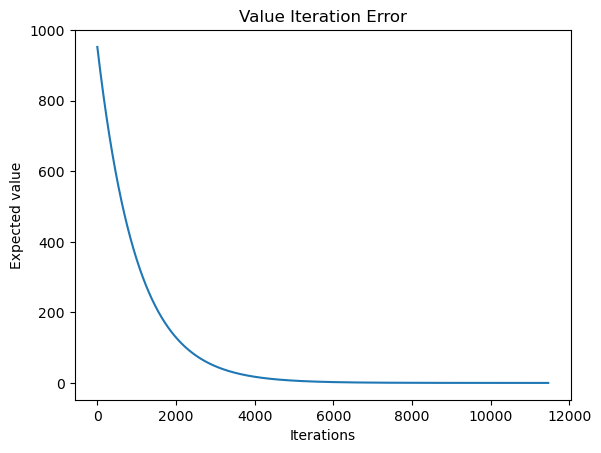

In [114]:
%matplotlib inline
plt.plot(vi_iter_hist, vi_value_hist)
plt.title("Value Iteration Error")
plt.xlabel("Iterations")
plt.ylabel("Expected value")
plt.show()

In [108]:
# Policy iteration
pi_value_hist = []
pi_time_hist = []
pi_iter_hist = []

pi = np.random.randint(0, ACTIONS, size=(STATES))

val = V_pi(pi).mean()

# For the sake of the logarithmic plot, we can not begin with 0
# Pick an initial time point that looks nice
pi_time_hist.append(0.4e-3)
pi_iter_hist.append(0)

t0 = time.time()
i = 0
while np.abs(val - V_star) > EPSILON:
    i += 1
    V_pi_est = V_pi(pi)
    Q_pi_est = Q_pi(V_pi_est)
    pi = greedy(Q_pi_est)
    val = V_pi_est.mean()
    
    print(f"iter={i}, mean value={val:.3f}, mean error={V_star - val:.3f}")
    pi_value_hist.append(V_star - val)
    pi_time_hist.append(time.time() - t0)
    pi_iter_hist.append(i+1)
    
val = V_pi(pi).mean()
print(f"Final policy: mean value={val:.3f}, mean error={V_star - val:.3f}")
pi_value_hist.append(V_star - val)

iter=1, mean value=482.747, mean error=470.629
iter=2, mean value=951.806, mean error=1.571
iter=3, mean value=953.374, mean error=0.002
Final policy: mean value=953.377, mean error=0.000


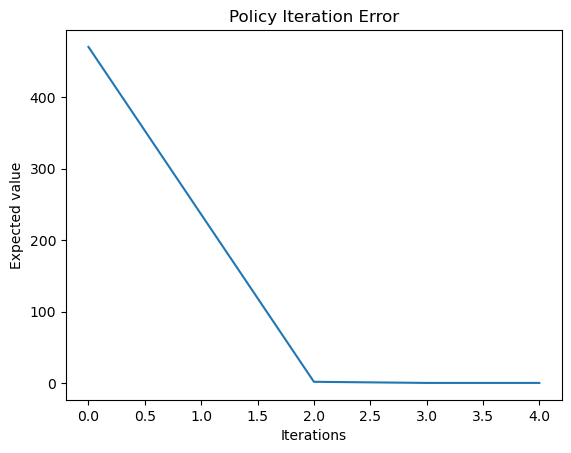

In [113]:
plt.plot(pi_iter_hist, pi_value_hist)
plt.title("Policy Iteration Error")
plt.xlabel("Iterations")
plt.ylabel("Expected value")
plt.show()

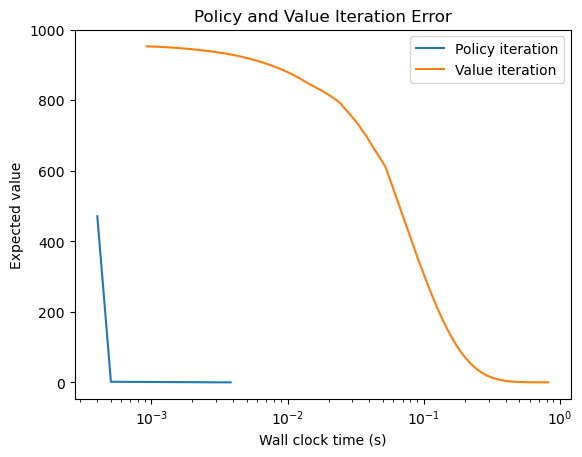

In [112]:
fig, ax = plt.subplots()
plt.plot(pi_time_hist, pi_value_hist, label="Policy iteration")
plt.plot(vi_time_hist, vi_value_hist, label="Value iteration")
ax.set_xscale('log')
plt.title("Policy and Value Iteration Error")
plt.xlabel("Wall clock time (s)")
plt.ylabel("Expected value")
plt.legend()
plt.show()

In [79]:
c = np.ones(STATES) / STATES
I_vstack = np.zeros((STATES * ACTIONS, STATES))
I_vstack[np.arange(STATES * ACTIONS), np.arange(STATES * ACTIONS)%STATES] = 1
p_mat_2d = np.reshape(p_mat, (STATES*ACTIONS, STATES))
rewards_vec = np.reshape(rewards, (STATES*ACTIONS))

In [86]:
t0 = time.time()
res = scipy.optimize.linprog(c, A_ub=-(I_vstack - GAMMA*p_mat_2d), b_ub=-rewards_vec, bounds=(0, 1/(1-GAMMA)))
t = time.time() - t0
print("LP method converged:", res.success)

LP method converged: True


In [87]:
Q_LP = Q_pi(res.x)
pi_LP = greedy(Q_LP)
V_LP = V_pi(pi_LP)
print(f"LP solution mean value: {V_LP.mean():.3f}. Time to solution: {t:.3f}s")

LP solution mean value: 953.017. Time to solution: 0.109s


In [88]:
c = np.reshape(rewards, (STATES*ACTIONS), order='F')
rho = np.ones(STATES)# / STATES
I_hstack = np.zeros((STATES, STATES*ACTIONS))
I_hstack[np.arange(STATES * ACTIONS)%STATES, np.arange(STATES * ACTIONS)] = 1
reshaped = np.transpose(p_mat, (2, 1, 0))
p_mat_2d = np.reshape(reshaped, (STATES, STATES*ACTIONS), order='C')

In [89]:
t0 = time.time()
res = scipy.optimize.linprog(-c, A_eq=(I_hstack - GAMMA*p_mat_2d), b_eq=rho, bounds=(0, None))
t = time.time() - t0
print("LP dual method converged:", res.success)

LP dual method converged: True


In [90]:
mu = np.reshape(res.x, (STATES,ACTIONS), order='F')
pi_p = mu / mu.sum(axis=1)[:, np.newaxis]
assert((pi_p >= 0).sum() == pi_p.size) # Assert it consists of only non-negative numbers
assert(np.array_equal(pi_p.sum(axis=1), np.ones(STATES))) # Assert pi is a valid probabilistic policy
assert(np.array_equal(pi_p.max(axis=1), np.ones(STATES))) # Assert that really, pi is deterministic
pi_d = np.argmax(pi_p, axis=1) # Convert to deterministic policy
V_LP_dual = V_pi(pi_d)
print(f"LP dual solution mean value: {V_LP_dual.mean():.3f}. Time to solution: {t:.3f}s")

LP dual solution mean value: 953.377. Time to solution: 0.212s
